# Statistics Project

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [15]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [16]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [18]:
boston_df.shape

(506, 14)

## Task 4

<Axes: ylabel='MEDV'>

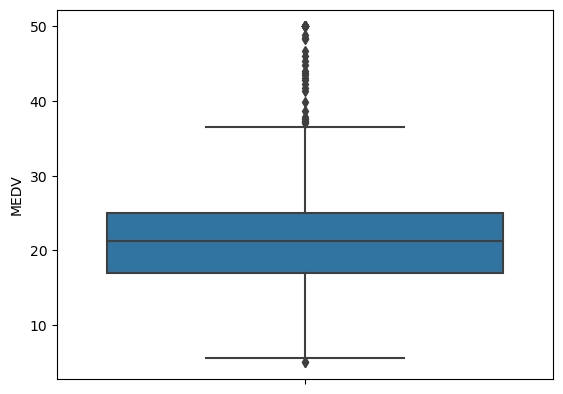

In [22]:
# Question 1: 

# Median value of owner occupied homes

sns.boxplot( y= 'MEDV', data = boston_df)

# Many properties have their median value of the owner occupied homes exceeding the outlier limit.

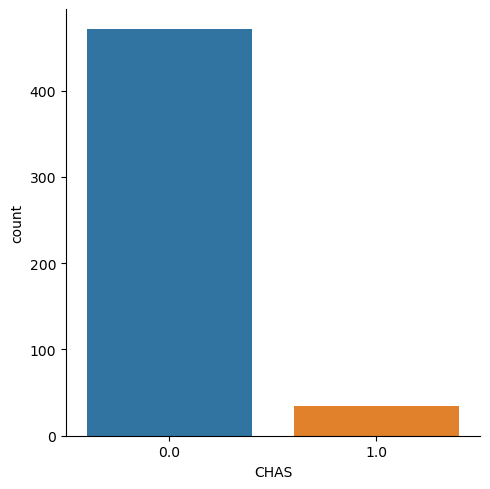

In [23]:
# Question 2: 

# Bar plot for the Charles river variable

sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)

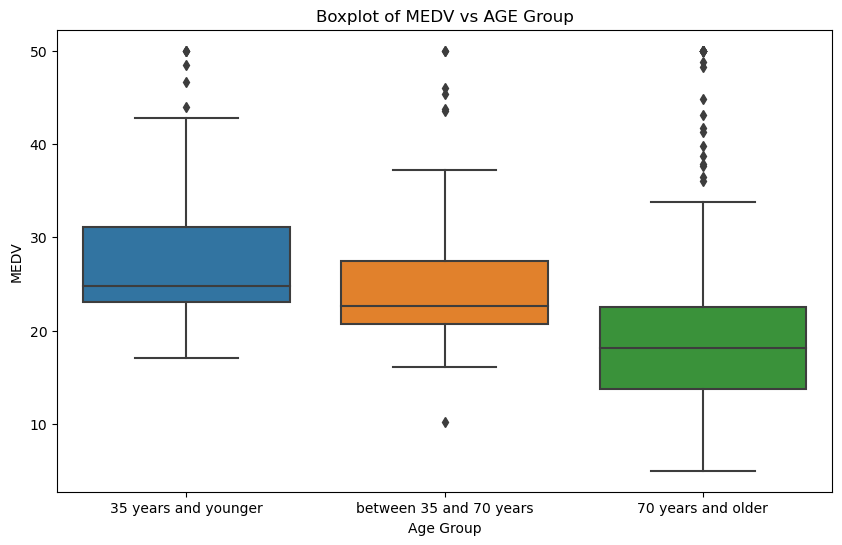

In [29]:
# Question 3:

# Create bins and labels
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

# Create a new column 'age_group'
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV vs AGE Group')

# Show the plot
plt.show()

<Axes: xlabel='NOX', ylabel='INDUS'>

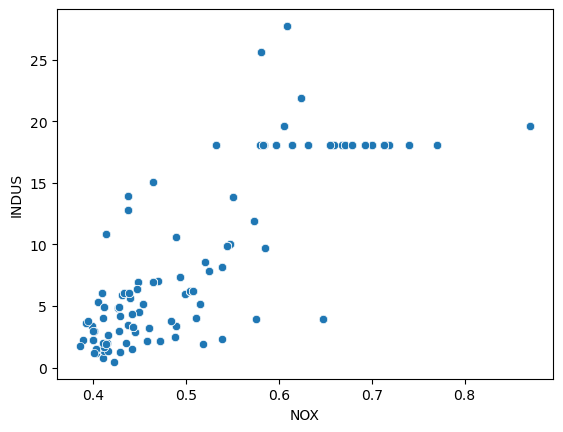

In [4]:
# Question 4

sns.scatterplot(x= 'NOX', y= 'INDUS', data = boston_df )

# A positive correlation exists between the Nitric oxide concentrations and the proportion of non-retail business acres per town

C:\Users\M\AppData\Local\Temp\ipykernel_6664\1104426501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'] , kde = False)


<Axes: xlabel='PTRATIO'>

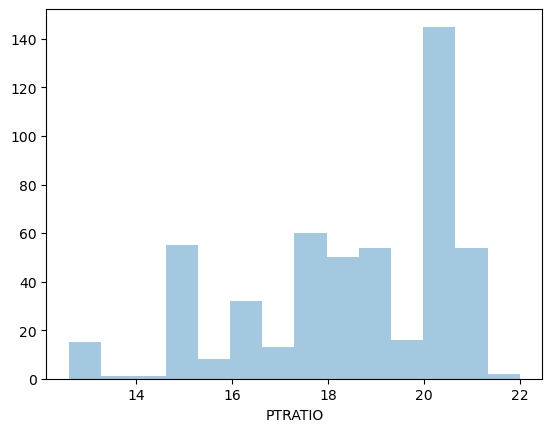

In [8]:
# Question 5

sns.distplot(boston_df['PTRATIO'] , kde = False)

## Task 5

### Question 1
State the hypothesis:
* $H_0:$ There is no significant difference in the median value of houses depending on the Charles river varaible.
* $H_1:$ There is a significant difference in the median value of houses depending on the Charles river varaible.

In [14]:
# Separate the data into two groups based on 'CHAS' values
group1 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Set the significance level to 5%
alpha = 0.05

# Check for significance
if p_value < alpha:
    print("There is a significant difference in median value of houses.")
else:
    print("There is no significant difference in median value of houses.")

# Print the t-statistic and p-value
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

There is a significant difference in median value of houses.
T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


### Question 2
State the hypothesis:
* $H_0:$ There is a significant difference in median values of houses for different levels of AGE.
* $H_1:$ There is no significant difference in median values of houses for different levels of AGE.

In [16]:
# Create a list of groups based on different levels of 'AGE'
groups = []
for age_value in boston_df['AGE'].unique():
    groups.append(boston_df[boston_df['AGE'] == age_value]['MEDV'])

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check for significance
if p_value < alpha:
    print("There is a significant difference in median values of houses for different levels of AGE.")
else:
    print("There is no significant difference in median values of houses for different levels of AGE.")

# Print the F-statistic and p-value
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

There is no significant difference in median values of houses for different levels of AGE.
F-statistic: 0.9840091646131573
P-value: 0.5539698276810093


### Question 3
State the hypothesis:
* $H_0:$ There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* $H_1:$ There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [24]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check for significance
if p_value < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

# Print the correlation coefficient and p-value
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Pearson Correlation Coefficient: 0.7636514469209161
P-value: 7.913361061230596e-98


### Question 4

In [ ]:
# Add a constant term to the predictor variable for the intercept
X = sm.add_constant(boston_df['DIS'])

# Fit the linear regression model
model = sm.OLS(boston_df['MEDV'], X).fit()

# Print the regression summary
print(model.summary())
